In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from pprint import pprint
from sklearn.decomposition import PCA
import random
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data

In [27]:
cdata = pd.read_csv('../features/features_larger.csv').dropna()

# Test and Train Data

In [29]:
X_train, y_train = [], []
X_test, y_test = [], []

for _ in range(0,1):
    data = cdata.sample(frac=1)

    X = data[data.columns[0:10]]
    y = data[data.columns[10]]

    X_train.append(X[0:int(0.75*len(X))])
    y_train.append(y[0:int(0.75*len(y))])

    X_test.append(X[int(0.75*len(X)):])
    y_test.append(y[int(0.75*len(X)):])

# Random Forest

Training Error: 0.8510965756060023 (0.0)
Testing Error: 0.8281430219146482 (0.0)


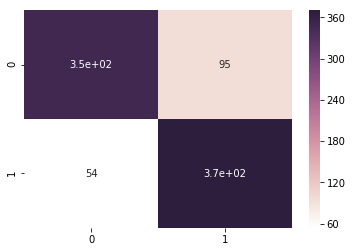

In [30]:
train_accuracy, test_accuracy = [], []

for i in range(0, len(X_train)):
    clf = RandomForestClassifier(max_depth=5, max_features=None)
    clf.fit(X_train[i], y_train[i])
    
    train_accuracy.append(clf.score(X_train[i], y_train[i]))
    test_accuracy.append(clf.score(X_test[i], y_test[i]))
    
    y_pred_0 = clf.predict(X_train[i])
    y_pred_1 = clf.predict(X_test[i])
    
    #con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    #con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    
    con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical'])
    con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical'])
    
    sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))
    
print('Training Error: {} ({})'.format(np.mean(train_accuracy), np.std(train_accuracy)))
print('Testing Error: {} ({})'.format(np.mean(test_accuracy), np.std(test_accuracy)))

# AdaBoost

Training Accuracy: 	 0.8372450942670258 (0.0)
Testing Accuracy: 	 0.8131487889273357 (0.0)


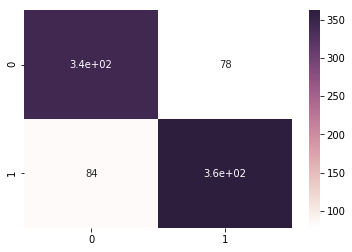

In [8]:
train_accuracy, test_accuracy = [], []

for i in range(0, len(X_train)):
    clf = AdaBoostClassifier()
    clf.fit(X_train[i], y_train[i])
    
    train_accuracy.append(clf.score(X_train[i], y_train[i]))
    test_accuracy.append(clf.score(X_test[i], y_test[i]))
    
    y_pred_0 = clf.predict(X_train[i])
    y_pred_1 = clf.predict(X_test[i])
    
    #con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    #con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    
    con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical'])
    con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical'])
    
    sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))
    
print('Training Accuracy: \t {} ({})'.format(np.mean(train_accuracy), np.std(train_accuracy)))
print('Testing Accuracy: \t {} ({})'.format(np.mean(test_accuracy), np.std(test_accuracy)))

# SVM

Training Accuracy: 	 0.8726433243555214 (0.0)
Testing Accuracy: 	 0.8085351787773933 (0.0)


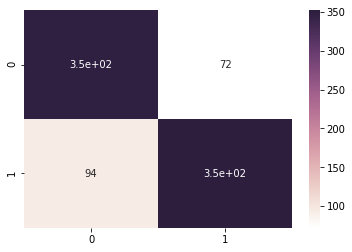

In [7]:
train_accuracy, test_accuracy = [], []

for i in range(0, len(X_train)):
    clf = svm.SVC(kernel='rbf',probability=False)
    clf.fit(X_train[i], y_train[i])
    
    train_accuracy.append(clf.score(X_train[i], y_train[i]))
    test_accuracy.append(clf.score(X_test[i], y_test[i]))
    
    y_pred_0 = clf.predict(X_train[i])
    y_pred_1 = clf.predict(X_test[i])
    
    #con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    #con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical', 'Jazz', 'Pop', 'Rock'])
    
    con_0 = confusion_matrix(y_train[i], y_pred_0, labels=['American Folk', 'Classical'])
    con_1 = confusion_matrix(y_test[i], y_pred_1, labels=['American Folk', 'Classical'])
    
    sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True))
    
print('Training Accuracy: \t {} ({})'.format(np.mean(train_accuracy), np.std(train_accuracy)))
print('Testing Accuracy: \t {} ({})'.format(np.mean(test_accuracy), np.std(test_accuracy)))

## Number of Components vs Variation

In [23]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
print(pca.explained_variance_ratio_ )

[6.53934091e-01 3.17081655e-01 1.22720543e-02 8.00483359e-03
 4.64307740e-03 2.76413184e-03 7.45930581e-04 3.82362422e-04
 1.04923399e-04 6.69411657e-05]


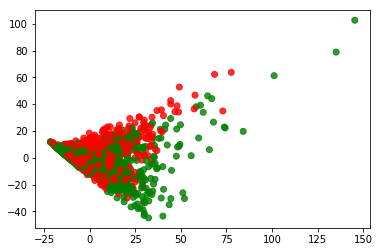

In [26]:
X_p = pca.transform(X)
X_p = np.transpose(X_p)
y_p = np.transpose(y)

#color = {'American Folk': 'red', 'Classical': 'green', 'Rock': 'blue', 'Jazz': 'yellow', 'Pop': 'purple'}
color = {'American Folk': 'red', 'Classical': 'green'}

y_color = [color[i] for i in y_p]

sns.regplot(x=X_p[0], y=X_p[1], fit_reg=False, scatter_kws={"color": y_color})